<a href="https://colab.research.google.com/github/edilsonml/Natural-Language-Processing/blob/main/Minera%C3%A7%C3%A3o_de_Texto_%2B_Classifica%C3%A7%C3%A3o_de_Emo%C3%A7%C3%A3o_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise e Mineração de texto para classificação de emoção**

Projeto do curso de Análise e Mineração de Texto e classiicação de emoção do Odemir Deprieri Jr. oferecido na plataforma Udemy.
 https://www.udemy.com/share/107eDE3@03A5v7MYrbupUkoPb54D7jCNjlGIERoARgDSar54Vy4dA4crIM5eVjfX6VH6jRNL/

Base de dados: <br>
https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr

In [73]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Avisos
import warnings
warnings.filterwarnings('ignore')

# configurações
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

plt.rcParams['figure.figsize'] = ( 12, 6 )
plt.style.use('seaborn-darkgrid')

# Libs
import re # REGEX
import nltk # NLP

In [74]:
#!pip install nltk

In [75]:
# Leitura da base de dados
base_dados = pd.read_csv('Tweets_Mg.csv')

# Dimensão
base_dados.shape

(8199, 26)

In [76]:
# Verificar base
base_dados.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Modelagem & EDA (Exploração)**

## **Campos Nulos**

In [77]:
base_dados.isnull().sum().sort_values(ascending= False)

Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 23                  8199
Unnamed: 22                  8199
Unnamed: 21                  8199
Unnamed: 20                  8199
Unnamed: 19                  8199
Unnamed: 18                  8199
Unnamed: 17                  8199
Unnamed: 16                  8199
Unnamed: 15                  8199
Unnamed: 14                  8199
Unnamed: 24                  8199
Unnamed: 11                  8199
Unnamed: 10                  8199
Observação                   8198
Geo Coordinates.longitude    8095
Geo Coordinates.latitude     8095
User Location                2710
Created At                      0
Classificacao                   0
Retweet Count                   0
User Screen Name                0
Username                        0
Text                            0
Unnamed: 0                      0
dtype: int64

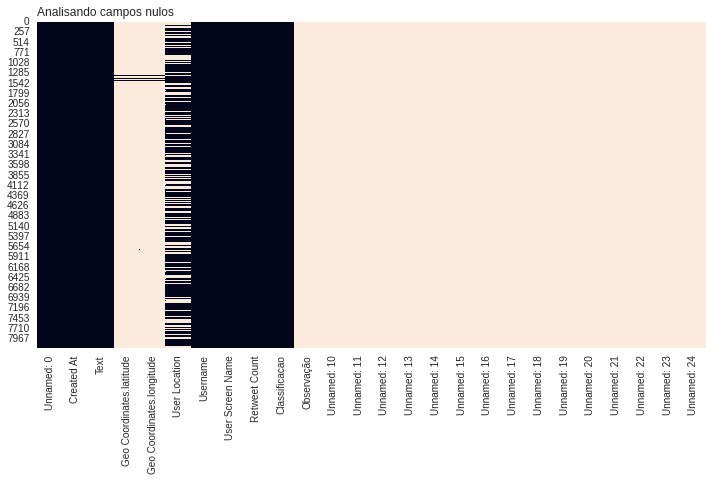

In [78]:
nulos = base_dados.isnull()

plt.title('Analisando campos nulos', loc='left') # cor clara representa valores nulos
sns.heatmap(nulos, cbar= False);

In [79]:
# Verificando colunas
base_dados.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [80]:
# Remoção de colunas com valores 100% nulos
colunas_extrair = base_dados.columns[10:]
base_dados.drop(columns= colunas_extrair, inplace= True)

In [81]:
# Verificação da dimensão após remoção de nulos
base_dados.shape

(8199, 10)

In [82]:
# Verificação de valores únicos
base_dados.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [83]:
# Remoção
base_dados.drop(['Unnamed: 0'], axis= 1, inplace= True)

In [84]:
# Dimensão
base_dados.shape

(8199, 9)

In [85]:
# Visualização da base
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo


In [86]:
# Informação da base
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


## **Ajustando Data**

In [87]:
# Função
from dateutil.parser import parse

experimento_data = base_dados['Created At'][0]

print(f'Antes: {experimento_data}')
print(f'Depois: {parse( experimento_data ).date() }')

Antes: Sun Jan 08 01:22:05 +0000 2017
Depois: 2017-01-08


In [88]:
# Função
def ajustar_data(data):
  '''
  Função para converter data
  '''
  # Atribuição
  texto_data = data
  # Transformação
  transformacao = parse( texto_data )
  # Extração
  data_formatada = transformacao.date()

  return data_formatada

In [89]:
# Aplicação da função para formatar data
base_dados['Data_Formatada'] = base_dados['Created At'].apply( ajustar_data )

In [90]:
# Filtro
base_dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08
1,Wândell,klefnews,0,Neutro,2017-01-08
2,Wândell,klefnews,0,Neutro,2017-01-08
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04
4,Emily,Milly777,0,Negativo,2017-01-09


In [91]:
# Outra forma de formatar a coluna 'Created At'
# base_dados['Created At'].apply( lambda texto : parse(texto).date() )

In [92]:
# Gerando anos, meses e dias

# transformação data
base_dados['Data_Formatada'] = pd.to_datetime( base_dados['Data_Formatada'] )

# Extraindo ano, mês e dia
base_dados['Ano'] = base_dados['Data_Formatada'].dt.year
base_dados['Mes'] = base_dados['Data_Formatada'].dt.month
base_dados['Dia'] = base_dados['Data_Formatada'].dt.day


base_dados.iloc[0:5, 5:]

,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [93]:
# Analisando os tweets
base_dados.groupby( by= ['Ano', 'Mes'] ).agg(
    Quantidade = ('Username', 'count')
)

Quantidade
Ano  Mes            
2016 12            3
2017 1          7073
     2          1123

## **Ajustando Geo-Localização**

In [94]:
base_dados.isnull().sum()

Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Data_Formatada                  0
Ano                             0
Mes                             0
Dia                             0
dtype: int64

In [95]:
analise_geo = base_dados.loc[
    ( base_dados['Geo Coordinates.latitude'].notnull() ) & 
    ( base_dados['Geo Coordinates.longitude'].notnull() )
]

# shape
analise_geo.shape

(104, 13)

In [96]:
# Verificação
analise_geo.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.933300,-18.850000,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
105,Fri Jan 06 13:31:11 +0000 2017,#road #trip #mg #car #gopro @ Governador Valad...,-41.933300,-18.850000,Brasil,Heliel Braga,helielbraga,0,Neutro,2017-01-06,2017,1,6
302,Fri Jan 06 00:10:47 +0000 2017,"��❤️ @ Governador Valadares, Minas Gerais http...",-41.933300,-18.850000,Snap: duraoluiza,Luiza�,LuizaFarias9,0,Neutro,2017-01-06,2017,1,6
607,Tue Jan 10 10:47:26 +0000 2017,"bom dia! (@ LFG in Governador Valadares, Minas...",-41.940796,-18.860655,"Minas, Brasil",snap: brunolasco ♎,brunolasco,0,Neutro,2017-01-10,2017,1,10


In [97]:
# Agrupar Geo-localização
analise_localizacao = analise_geo.groupby( by= ['Geo Coordinates.latitude', 'Geo Coordinates.longitude'] ).count()[['Username']].reset_index()

# Renomeando as colunas
analise_localizacao.columns = ['Lat', 'Lon', 'Quantidade']

# Verificando
analise_localizacao.head()

,Lat,Lon,Quantidade
0,-46.643035,-22.270759,2
1,-46.627106,-23.493237,2
2,-46.616726,-21.131515,1
3,-45.523750,-22.330291,1
4,-45.236850,-19.331757,1


In [98]:
# Plot dos dados
px.density_mapbox(
    # dados
    analise_localizacao,
    # Latitude
    lat = 'Lat',
    # Longitude
    lon = 'Lon',
    # Quantidade
    z = 'Quantidade',
    # Estilo do mapa
    mapbox_style= 'stamen-terrain',
    # Centralização
    center= dict(lat= -23.700, lon= -46.555),
    # Zoom mapa
    zoom = 3,
    # Circulo
    radius = 30
)

In [99]:
# Verificando
base_dados['User Location'].head(20)

0                             Brasil
1                                NaN
2                                NaN
3                                NaN
4                                NaN
5         Um Outro Mundo É Possível 
6                                NaN
7             Belo Horizonte, Brasil
8                                NaN
9                Belo Horizonte - MG
10      error 404 location not found
11              Minas Gerais, Brasil
12    Santo Antônio do Monte, Brasil
13                            BRASIL
14                               NaN
15            San Pedro Garza García
16                               NaN
17            Belo Horizonte, Brasil
18          Belo Horizonte MG Brasil
19          Belo Horizonte/MG/Brasil
Name: User Location, dtype: object

In [100]:
# Instalando Geo py
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
# Função
from geopy.geocoders import Nominatim

# Instanciando a função
instanciando_funcao = Nominatim( user_agent = 'GetLoc')

In [102]:
print(f'Local: {instanciando_funcao.geocode("Brasil").address } ')
print(f'Latitude: {instanciando_funcao.geocode("Brasil").latitude } ')
print(f'Longitude: {instanciando_funcao.geocode("Brasil").longitude } ')

Local: Brasil 
Latitude: -10.3333333 
Longitude: -53.2 


In [103]:
# Analise de representatividade
analise_local = base_dados['User Location'].value_counts(normalize= True).cumsum().reset_index()

# Filtrando até 50% 
analise_local = analise_local.loc[ analise_local['User Location'] < 0.5 ]

# Renomear as colunas
analise_local.columns = ['Local', '%']

# Verificando 
analise_local.head()

,Local,%
0,Brasil,0.107670
1,Minas Gerais,0.172163
2,Belo Horizonte - Minas Gerais,0.214793
3,"Belo Horizonte, Brasil",0.256149
4,Belo Horizonte,0.280015


In [104]:
# Dimensão
analise_local.shape

(39, 2)

In [105]:
# Calcular a quantidade
quantidade = base_dados['User Location'].value_counts().reset_index()

quantidade.columns = ['Local', 'Quantidade']

quantidade.head()

,Local,Quantidade
0,Brasil,591
1,Minas Gerais,354
2,Belo Horizonte - Minas Gerais,234
3,"Belo Horizonte, Brasil",227
4,Belo Horizonte,131


In [106]:
tab_localizacao = pd.merge( analise_local, quantidade, on=['Local'], how='inner' )

tab_localizacao.head()

,Local,%,Quantidade
0,Brasil,0.107670,591
1,Minas Gerais,0.172163,354
2,Belo Horizonte - Minas Gerais,0.214793,234
3,"Belo Horizonte, Brasil",0.256149,227
4,Belo Horizonte,0.280015,131


In [107]:
# Valores únicos
tab_localizacao['Local'].unique()

array(['Brasil', 'Minas Gerais', 'Belo Horizonte - Minas Gerais',
       'Belo Horizonte, Brasil', 'Belo Horizonte', 'Brazil',
       'São Paulo, Brasil', 'Rio de Janeiro, Brasil',
       'Belo Horizonte MG Brasil', 'São Paulo', 'Minas Gerais, Brasil',
       'Guarulhos - SP', 'Rio de Janeiro', 'São Joquim de Bicas',
       'Brasília, Brasil', 'Brasil Natal/RN', '-16.683649,-49.268102',
       'Babilonia', 'Rio de Janeiro, Brazil',
       'Fortaleza - Ceará - Brazil', 'WorldWide', 'Manaus-Amazonas',
       'BRASIL', 'Belo Horizonte, Minas Gerais', 'Rio de Janeiro, RJ',
       'Belo Horizonte - MG', 'Ouro Preto - MG Brasil',
       'Governador Valadares', 'Belo Horizonte/MG', 'Hollywood, CA',
       'Minas Gerais - Brasil', 'Sorocaba, Brasil',
       'Governador Valadares, Brasil', 'No coração das Minas Gerais ',
       'brasil', 'Vitória - ES, Brasil', 'Pará de Minas / MG',
       'República de Curitiba', 'Belo Horizonte, MG'], dtype=object)

In [108]:
# Incluindo a Geo-Localização com GEOPY

tab_localizacao['Latitude'] = None
tab_localizacao['Longitude'] = None

# Loop
for i in range(0, len(tab_localizacao['Local']) ):

  try:
    local = instanciando_funcao.geocode( tab_localizacao['Local'][i] )

  except:
    pass

  if local!= None:    
    tab_localizacao['Latitude'][i] = local.latitude
    tab_localizacao['Longitude'][i] = local.longitude  

In [109]:
tab_localizacao.head()

,Local,%,Quantidade,Latitude,Longitude
0,Brasil,0.107670,591,-10.333333,-53.2
1,Minas Gerais,0.172163,354,-18.526484,-44.158865
2,Belo Horizonte - Minas Gerais,0.214793,234,-19.922732,-43.945095
3,"Belo Horizonte, Brasil",0.256149,227,-19.922732,-43.945095
4,Belo Horizonte,0.280015,131,-19.922732,-43.945095


In [110]:
# Plot dos dados
px.density_mapbox(
    # dados
    tab_localizacao,
    # Latitude
    lat = 'Latitude',
    # Longitude
    lon = 'Longitude',
    # Quantidade
    z = 'Quantidade',
    # Estilo do mapa
    mapbox_style= 'stamen-terrain',
    # Centralização
    center= dict(lat= -23.700, lon= -46.555),
    # Zoom mapa
    zoom = 3,
    # Circulo
    radius = 30
)

## **Analise outras variáveis**

In [111]:
# Usuários
base_dados['Username'].value_counts()

POLÍCIA MILITAR MG      297
Daniel Araujo #beta     124
Hugo TIMBETA            100
Camila Maciel Serrão     91
Raynniere Makepeace      77
                       ... 
Russo Guedes              1
LUCIANO-LUMOTOKA          1
Hilton Vilar              1
tina thom                 1
Pornografia Destrói       1
Name: Username, Length: 3907, dtype: int64

In [112]:
# Usuários
base_dados['User Screen Name'].value_counts()

pmmg190            297
danaraujjobeta     124
Hugotim1           100
CamilaMacielSer     91
itsRaynniere        77
                  ... 
gcvascon             1
ClaudioHirakawa      1
SeleneSCW            1
MarcusMartinho       1
porndestroi          1
Name: User Screen Name, Length: 3966, dtype: int64

In [113]:
# Retweets
base_dados['Retweet Count'].value_counts(normalize= True).head()

0      0.549091
1      0.072692
2      0.037444
444    0.036590
3      0.021100
Name: Retweet Count, dtype: float64

## **Analise da Classificação**

In [114]:
base_dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [115]:
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9


In [116]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


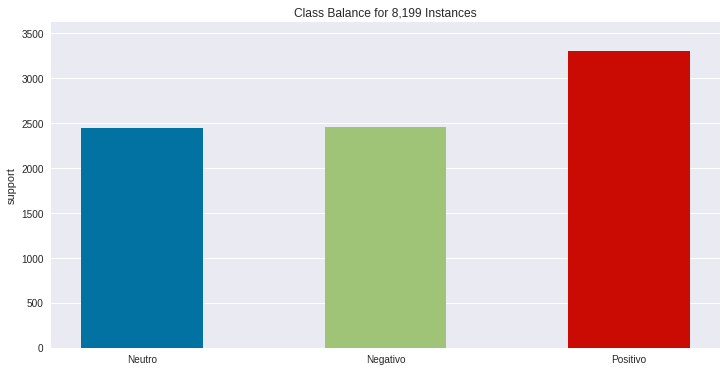

In [117]:
# Yellow Brick - verificando balanceamento da base
from yellowbrick import ClassBalance

# instanciar a base
grafico_balanco = ClassBalance(labels=['Neutro', 'Negativo', 'Positivo'])
grafico_balanco.fit(base_dados['Classificacao'])
grafico_balanco.show();

In [118]:
# Plot - Avaliar
anl_valores = base_dados['Classificacao'].value_counts()

# Plotly
grafico_balanco2 = go.Figure(
    go.Funnelarea(
        text= anl_valores.index,
        values = anl_valores.values,
        title={'text': 'Distribuição dos sentimentos', 'position': 'top center'}
    )
)
grafico_balanco2.show()

### **Quantidade de Palavras**

In [119]:
# Quantidade de palavras
exemplo = 'Hoje está chovendo!'
exemplo.split()
len( exemplo.split() )

3

In [120]:
# Função para calcular o tamanho
def quantidade_palavras(texto):
  quebrar = texto.split()
  quantidade = len(quebrar)

  return quantidade

In [121]:
# Aplicação da função
base_dados['Quantidade palavras'] = base_dados['Text'].apply(quantidade_palavras)

# Verificação
base_dados.head()

,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Data_Formatada,Ano,Mes,Dia,Quantidade palavras
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,2017-01-08,2017,1,8,10
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,2017-01-08,2017,1,8,7
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,2017-01-04,2017,1,4,2
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,2017-01-09,2017,1,9,20


In [122]:
# Análise
base_dados['Quantidade palavras'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Quantidade palavras, dtype: float64

In [123]:
# Plot
px.box(base_dados, x='Classificacao', y= 'Quantidade palavras', color= 'Classificacao', title= 'Quantidade Palavras por Sentimento')

### **Nuvem de Palavras**

In [124]:
#!pip install wordcloud

# Função para nuvem de cloud
from wordcloud import WordCloud

In [125]:
# Criando uma Wordcloud
# 1º Concatenar o texto em uma única string

# Variável
concatenar = ''

# Loop no texto
for loop in base_dados['Text']:

  # Loop  para concatenar
  for palavra in loop.split():

    # Juntando as palavras
    concatenar = concatenar + ' ' + palavra

print(f'Quantidade de palavras agrupadas { len(concatenar) }')

Quantidade de palavras agrupadas 961415


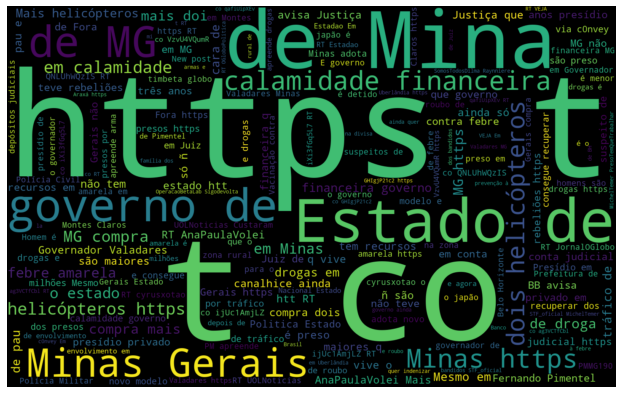

In [126]:
# Plot
# 2º etapa

# Instanciando a nuvem de palavra
nuvem_palavras = WordCloud( width= 1600, height= 1000).generate(concatenar)

# Tamanho
figura, eixo = plt.subplots( figsize= (15, 7) )
eixo.imshow( nuvem_palavras, interpolation= 'bilinear')
# Desativa os grids
eixo.set_axis_off();

In [127]:
base_dados['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

In [128]:
# Ajuste dos textos

palavras_positivas = ''
palavras_negativas = ''
palavras_neutras = ''

# Loop
for sentimento in base_dados['Classificacao'].unique():

   # Análise positivo
   if sentimento == 'Positivo':
     filtro = base_dados.loc[base_dados['Classificacao'] == sentimento]

     # Loop para concatenar
     for palavra in filtro['Text']:
       for quebra in palavra.split():
         palavras_positivas = palavras_positivas + ' ' + quebra

   # Análise negativo
   elif sentimento == 'Negativo':
     filtro = base_dados.loc[base_dados['Classificacao'] == sentimento]

     # Loop para concatenar
     for palavra in filtro['Text']:
       for quebra in palavra.split():
         palavras_negativas = palavras_negativas + ' ' + quebra

  # Análise neutro
   else:
     filtro = base_dados.loc[base_dados['Classificacao'] == sentimento]

     # Loop para concatenar
     for palavra in filtro['Text']:
       for quebra in palavra.split():
         palavras_neutras = palavras_neutras + ' ' + quebra


      
print(
      'Quantidade de palavras: \n',
      f'Positivas: {len( palavras_positivas ) }',
      f'Negativas: {len( palavras_negativas ) }',
      f'Neutras: {len( palavras_neutras ) }'
  )

Quantidade de palavras: 
 Positivas: 374456 Negativas: 307576 Neutras: 279383


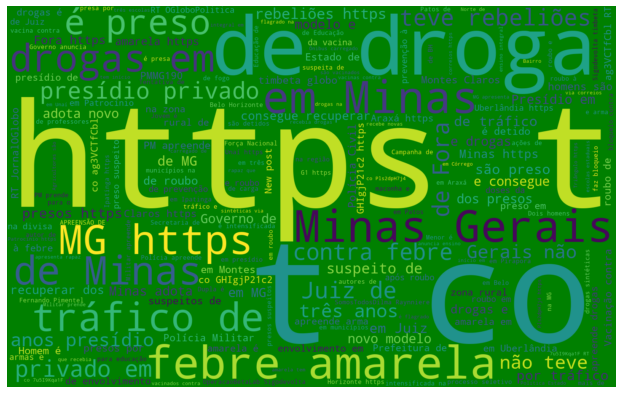

In [129]:
# Análise Sentimentos - Wordcloud positivas
# 2º etapa

# Instanciando a nuvem de palavra
nuvem_palavras = WordCloud( width= 1600, height= 1000, background_color= 'green').generate(palavras_positivas)

# Tamanho
figura, eixo = plt.subplots( figsize= (15, 7) )
eixo.imshow( nuvem_palavras, interpolation= 'bilinear')
# Desativa os grids
eixo.set_axis_off();

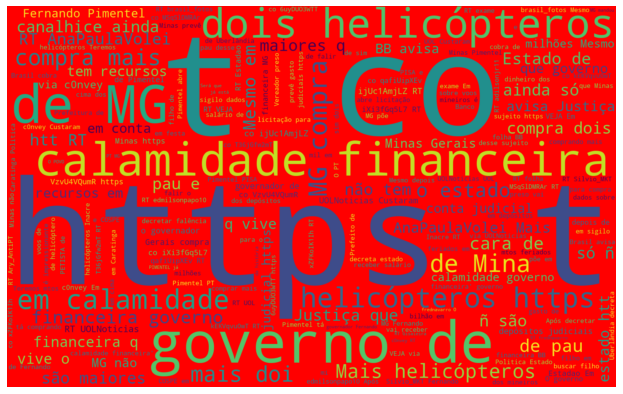

In [130]:
# Análise Sentimentos - Wordcloud negativas

# Instanciando a nuvem de palavra
nuvem_palavras = WordCloud( width= 1600, height= 1000, background_color= 'red').generate(palavras_negativas)

# Tamanho
figura, eixo = plt.subplots( figsize= (15, 7) )
eixo.imshow( nuvem_palavras, interpolation= 'bilinear')
# Desativa os grids
eixo.set_axis_off();

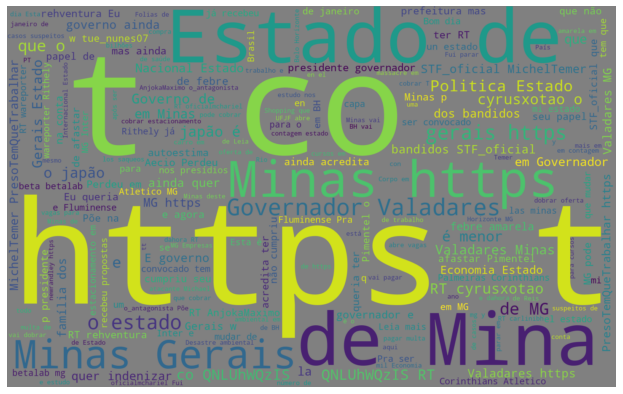

In [131]:
# Análise Sentimentos - Wordcloud neutras
# 2º etapa

# Instanciando a nuvem de palavra
nuvem_palavras = WordCloud( width= 1600, height= 1000, background_color= 'grey').generate(palavras_neutras)

# Tamanho
figura, eixo = plt.subplots( figsize= (15, 7) )
eixo.imshow( nuvem_palavras, interpolation= 'bilinear')
# Desativa os grids
eixo.set_axis_off();

### **Rank das palavras mais usadas**

In [132]:
# Funcão
from collections import Counter

In [133]:
# Quebrar as frases
quebra_frases = base_dados['Text'].apply(lambda texto : str(texto).split())

# Rank das palavras
dados_rank = Counter( [ item for sublist in quebra_frases for item in sublist] )

In [134]:
quebra_frases[0:10]

0    [���⛪, @, Catedral, de, Santo, Antônio, -, Gov...
1    [�, @, Governador, Valadares,, Minas, Gerais, ...
2    [��, @, Governador, Valadares,, Minas, Gerais,...
3                       [���, https://t.co/BnDsO34qK0]
4    [���, PSOL, vai, questionar, aumento, de, vere...
5    [", bom, é, bandido, morto", Deputado, Cabo, J...
6    ["..E, 25%, dos, mineiros, dizem, não, torcer,...
7    ["A, gigantesca, barba, do, mal", em, destaque...
8    ["BB, e, governo, de, Minas, travam, disputa, ...
9    ["com, vcs, bh, fica, pequena!", Belo, Horizon...
Name: Text, dtype: object

In [135]:
dados_rank

Counter({'���⛪': 1,
         '@': 14,
         'Catedral': 1,
         'de': 8352,
         'Santo': 3,
         'Antônio': 1,
         '-': 1937,
         'Governador': 377,
         'Valadares/MG': 4,
         'https://t.co/JSbKamIqUJ': 1,
         '�': 55,
         'Valadares,': 128,
         'Minas': 2626,
         'Gerais': 920,
         'https://t.co/B3ThIDJCSf': 1,
         '��': 16,
         'https://t.co/dPkgzVR2Qw': 1,
         '���': 14,
         'https://t.co/BnDsO34qK0': 2,
         'PSOL': 3,
         'vai': 162,
         'questionar': 3,
         'aumento': 13,
         'vereadores': 8,
         'e': 2079,
         'prefeito': 34,
         'BH': 130,
         'na': 523,
         'Justiça': 337,
         'Politica': 221,
         'Estado': 1282,
         'https://t.co/DMg7BGsek5': 1,
         '"': 14,
         'bom': 8,
         'é': 1214,
         'bandido': 5,
         'morto"': 1,
         'Deputado': 5,
         'Cabo': 5,
         'Júlio': 8,
         'condenado': 5,

In [136]:
# Tabela
tab_quantidade = pd.DataFrame( dados_rank.most_common(20) )

# Ajustar as colunas
tab_quantidade.columns= ['Palavra', 'Qtd']

# Verificar a tabela
tab_quantidade

,Palavra,Qtd
0,de,8352
1,em,4003
2,RT,3080
3,Minas,2626
4,e,2079
5,-,1937
6,MG,1849
7,a,1707
8,o,1419
9,do,1415


In [137]:
# Plot das quantidades
figura = px.bar(
    tab_quantidade,
    x= 'Qtd',
    y= 'Palavra',
    color= 'Palavra',
    orientation= 'h',
    width= 700,
    height= 700,
    title= 'Palavras mais utilizadas'
)

figura.show()

# **Mineração de Texto**

## **Remoção duplicados**

In [138]:
# Copiando base de dados
copia_base = base_dados.copy()

# Antes
print(base_dados.shape)

# Eliminar duplicados
base_dados.drop_duplicates( ['Text'], inplace= True)

# Depois
print(base_dados.shape)

(8199, 14)
(5765, 14)


## **Stops Words**

In [139]:
# Download
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [141]:
# Verificar conteúdo
nltk.corpus.stopwords.words('portuguese')[0:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [142]:
# Tamanho
len( nltk.corpus.stopwords.words('portuguese') )

207

In [144]:
# Exemplo
frase = 'Aqueles rapazes estão  felizes'

# Pool de StopWords - Português
pool_palavras = nltk.corpus.stopwords.words('portuguese')

# Quebra da frase
quebra= frase.split()

# Loop
for palavra in quebra:
  palavra = palavra.lower()

  if palavra not in pool_palavras:
      print( palavra )

rapazes
felizes


In [145]:
# Adicionar palavras
print( type( pool_palavras) )

<class 'list'>


In [ ]:
# Pode ser adicionado mais palavras no pool de palavras dependendo do tipo de projeto
# Exemplo
# pool_palavras.append('Excelentíssimo')

## **Radical (stemming)**

In [146]:
# Download
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [148]:
# Função radical
radical = nltk.stem.RSLPStemmer()

# Lista palavras
palavras = ['Gostei', 'Gostam', 'Gostarão', 'Gostamos', 'Gostaram']

for palavra in palavras:
  print(palavra, ' - ', radical.stem( palavra) )

Gostei  -  gost
Gostam  -  gost
Gostarão  -  gost
Gostamos  -  gost
Gostaram  -  gost


## **REGEX**

In [149]:
# Expressões regulares
frase_exemplo = 'Acessei o site do google https:\\www.google.com.br e achei simples!'

In [152]:
# Localizar um padrão
re.findall('www.google', frase_exemplo)

['www.google']

In [156]:
# Localizar letras
re.findall('[a-d]', frase_exemplo )

['c', 'd', 'c', 'b', 'a', 'c']

In [159]:
# Localizar sequência
re.findall('goo...', frase_exemplo), re.findall('..te', frase_exemplo), re.findall('.it.', frase_exemplo)

(['google', 'google'], ['site'], ['site'])

In [162]:
# Substituir valores/textos
print('Antes:', frase_exemplo)
print('Depois:', re.sub('site', '__SITE__;D', frase_exemplo ))

Antes: Acessei o site do google https:\www.google.com.br e achei simples!
Depois: Acessei o __SITE__;D do google https:\www.google.com.br e achei simples!


## **Frequências de Palavras**

In [166]:
# Exemplo
frase = 'Hoje o dia está bonito, incusive hoje estou gravando um treinamento de ciência de dados.'

In [169]:
# Aplicação com o NLTK
frequencia = nltk.FreqDist( frase.split() )

# Visualização
frequencia.most_common(5)

[('de', 2), ('Hoje', 1), ('o', 1), ('dia', 1), ('está', 1)]

# **Construção do Modelo**

In [210]:
# Separar os dados
dados_modelo = base_dados[['Text', 'Classificacao']]

dados_modelo.shape

(5765, 2)

## **Limpeza dos dados**

In [205]:
# Limpeza 
exemplo = base_dados['Text'][6]

print(exemplo)

"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR


In [181]:
# Retirando os links
re.sub('https:\S+', '', exemplo)

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG '

In [182]:
# Converter para minúsculo
exemplo.lower()

'���⛪ @ catedral de santo antônio - governador valadares/mg https://t.co/jsbkamiquj'

In [189]:
# Retirar caracteres especiais
re.sub( '["("")"?@|$|.|!"-",:%;"]', '' , exemplo)

'E 25 dos mineiros dizem não torcer para time nenhummesmo dentro de um estado com Atlético-MG e Cruzeiro Pq https//tco/fN5evlLQsR'

In [197]:
# Retirar emojis
retirar_emojis = re.compile(
  "["
      u"\U0001F600-\U0001F64F"  # Emojis
      u"\U0001F300-\U0001F5FF"  # Simbolos
      u"\U0001F680-\U0001F6FF" 
      u"\U0001F1E0-\U0001F1FF"  
      u"\U0001F1F2-\U0001F1F4"  
      u"\U0001F1E6-\U0001F1FF" 
      u"\U0001F600-\U0001F64F"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U0001F1F2"
      u"\U0001F1F4"
      u"\U0001F620"
      u"\u200d"
      u"\u2640-\u2642"
  "]+", flags=re.UNICODE)

retirar_emojis.sub( '', exemplo )

' @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ'

In [201]:
# Retirar hashtags
re.sub('#\S+', '', exemplo)

'���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ'

In [207]:
# Retirar valores númericos 
re.sub('[0-9]', '', exemplo)

'"..E % dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fNevlLQsR'

In [208]:
# Camadas
def limpeza_dados( texto):
  '''
    Função para limpar os dados  
  '''
  # Camada 1 - Retirar os links
  camada_01 = re.sub('https:\S+', '', texto)

  # Camada 2 - Converter para minúsculo
  camada_02 = camada_01.lower()

  # Camada 3 - Retirar os caracteres especiais
  camada_03 = re.sub( '["("")"?@|$|.|!"-",:%;"]', '' , camada_02)

  # Camada 4 - Retirar emojis
  retirar_emojis = re.compile(
    "["
        u"\U0001F600-\U0001F64F"  # Emojis
        u"\U0001F300-\U0001F5FF"  # Simbolos
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F1F2-\U0001F1F4"  
        u"\U0001F1E6-\U0001F1FF" 
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
    "]+", flags=re.UNICODE)

  camada_04 = retirar_emojis.sub( '', camada_03 )

  # Camada 5 - Retirar Hashtags
  camada_05 = re.sub('#\S+', '', camada_04)

  # Camada 6 - Retirar valores numéricos
  camada_06 = re.sub('[0-9]', '', camada_05)
  
  return camada_06

In [209]:
limpeza_dados(exemplo)

'e  dos mineiros dizem não torcer para time nenhummesmo dentro de um estado com atlético-mg e cruzeiro pq '

In [211]:
# Aplicando a função
dados_modelo['Text'] = dados_modelo['Text'].apply( limpeza_dados )

dados_modelo.head()

,Text,Classificacao
0,catedral de santo antônio - governador valad...,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento de vereadores e p...,Negativo


## **StopWords**

In [212]:
# Pool de palavras
grupo_palavras = nltk.corpus.stopwords.words('portuguese')

len(grupo_palavras)

207

In [226]:
# Remover StopWords
def remover_stopwords(texto):
  '''
    Remover as "stop words" (palavras sem significado, ex. artigo, conjunção, preposição, etc....)
  '''

  # Quebrar as frases
  lista_palavras = texto.split()

  # Nova frase
  frase_ajustada = ''

  # Loop
  for palavra in lista_palavras:

    # Validar se é uma StopWord
    if palavra not in grupo_palavras:
      frase_ajustada = frase_ajustada + ' ' + palavra      

  return frase_ajustada

In [227]:
remover_stopwords(exemplo)

' "..E 25% mineiros dizem torcer time nenhum,mesmo dentro estado Atlético-MG Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [228]:
# Aplicando a função para remoção das StopWords
dados_modelo['Text'] = dados_modelo['Text'].apply( remover_stopwords )

dados_modelo.head()

,Text,Classificacao
0,catedral santo antônio - governador valadares/mg,Neutro
1,governador valadares minas gerais,Neutro
2,governador valadares minas gerais,Neutro
3,,Neutro
4,psol vai questionar aumento vereadores prefei...,Negativo


## **Extração do Radical**

In [236]:
# Definir a função do radical
radical = nltk.stem.RSLPStemmer()

In [237]:
# Criando a funçáo para extrair o radical
def extrair_radical(texto):
  '''
    Extrair o radical da palavra (raiz da palavra)
  '''

  # Quebrar as frases
  lista_palavras = texto.split()

  # Nova frase
  frase_ajustada = ''

  # Loop
  for palavra in lista_palavras:

    # aplicar o radical
    extracao = radical.stem(palavra)

    frase_ajustada = frase_ajustada + ' ' + extracao

  return frase_ajustada

In [238]:
extrair_radical(exemplo)

' ".. 25% do min diz não torc par tim nenhum,mesm dentr de um est com atlético-mg e cruzeiro. pq?.." https://t.co/fn5evllqsr'

In [239]:
# Aplicando a função para remoção dos radicais
dados_modelo['Text'] = dados_modelo['Text'].apply( extrair_radical )

dados_modelo.head()

,Text,Classificacao
0,catedr sant antôni - govern valadares/mg,Neutro
1,govern valad min geral,Neutro
2,govern valad min geral,Neutro
3,,Neutro
4,psol vai quest aument vere prefeit bh justiç ...,Negativo


## **Tokenização**

In [240]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [241]:
from nltk.tokenize import word_tokenize
exemplo

'"..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." https://t.co/fN5evlLQsR'

In [245]:
word_tokenize(exemplo)

['``',
 '..',
 'E',
 '25',
 '%',
 'dos',
 'mineiros',
 'dizem',
 'não',
 'torcer',
 'para',
 'time',
 'nenhum',
 ',',
 'mesmo',
 'dentro',
 'de',
 'um',
 'estado',
 'com',
 'Atlético-MG',
 'e',
 'Cruzeiro',
 '.',
 'Pq',
 '?',
 '..',
 "''",
 'https',
 ':',
 '//t.co/fN5evlLQsR']

In [244]:
pd.DataFrame(word_tokenize(exemplo) ).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,``,..,E,25,%,dos,mineiros,dizem,não,torcer,para,time,nenhum,",",mesmo,dentro,de,um,estado,com,Atlético-MG,e,Cruzeiro,.,Pq,?,..,'',https,:,//t.co/fN5evlLQsR


## **Modelo**

In [246]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

In [247]:
# Exemplo - Representação em uma matriz esparsa (Ver documentação Scipy)
## https://docs.scipy.org/doc/scipy/reference/sparse.html
corpus = [
    'This is the first document',
    'This document is the second document',
    'and this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

vectorizer.get_feature_names_out()

print( X.toarray() )

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [252]:
# Separar os dados 
frases = dados_modelo['Text']
classes = dados_modelo['Classificacao']

# Divisão em base de treino e base de teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(
    frases, classes, test_size= 0.2, random_state= 10
)

print(f'Quantidade de dados de treino: {x_treino.shape[0]}' )
print(f'Quantidade de dados de teste: {x_teste.shape[0]}' )

Quantidade de dados de treino: 4612
Quantidade de dados de teste: 1153


In [254]:
# Instanciando o método
token = TweetTokenizer()
Vetorizacao = CountVectorizer(analyzer= 'word', tokenizer= token.tokenize) # Criação da matriz esparsa

In [268]:
# Aplicando a transformação
vetor_X_treino = Vetorizacao.fit_transform( x_treino )

type( vetor_X_treino )

scipy.sparse.csr.csr_matrix

In [269]:
# Visualizar a matriz esparsa
vetor_X_treino.toarray()[0][200:300]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [270]:
vetor_X_treino

<4612x4577 sparse matrix of type '<class 'numpy.int64'>'
	with 43398 stored elements in Compressed Sparse Row format>

In [266]:
# Importação biblioteca MultinomialNB
from sklearn.naive_bayes import MultinomialNB

In [271]:
from statsmodels.discrete.discrete_model import MultinomialModel
# Treinamento do modelo
# Instanciando o modelo
modelo_NB = MultinomialNB()


# Treinando o modelo
modelo_NB.fit( vetor_X_treino, y_treino )

MultinomialNB()

## **Avaliação do Modelo**

In [272]:
# Transformação no x_teste
vetor_x_teste = Vetorizacao.transform( x_teste )

vetor_x_teste

<1153x4577 sparse matrix of type '<class 'numpy.int64'>'
	with 10400 stored elements in Compressed Sparse Row format>

In [273]:
# Previsões do modelo treinado
previsoes = modelo_NB.predict( vetor_x_teste )

In [274]:
previsoes

array(['Positivo', 'Positivo', 'Neutro', ..., 'Positivo', 'Positivo',
       'Negativo'], dtype='<U8')

In [276]:
y_teste.values

array(['Positivo', 'Positivo', 'Positivo', ..., 'Positivo', 'Positivo',
       'Negativo'], dtype=object)

In [282]:
y_teste.unique()

array(['Positivo', 'Neutro', 'Negativo'], dtype=object)

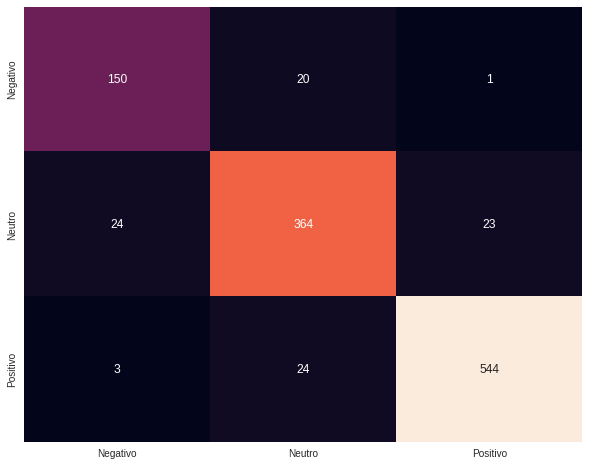

In [290]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Definindo as classes
classes = ['Negativo', 'Neutro', 'Positivo']

# Plot
matriz_confusao = confusion_matrix( y_teste, previsoes )

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusao, annot= True, cbar= False, fmt= 'd', yticklabels= classes, xticklabels= classes);

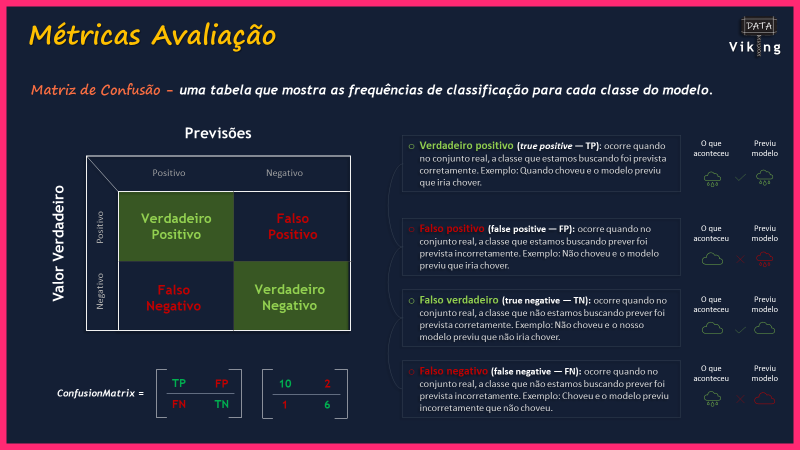

In [286]:
# Relatorio de classificação
from sklearn.metrics import classification_report

# Avaliacao
avaliacao = classification_report( y_teste, previsoes )
print( avaliacao )

              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       171
      Neutro       0.89      0.89      0.89       411
    Positivo       0.96      0.95      0.96       571

    accuracy                           0.92      1153
   macro avg       0.90      0.91      0.90      1153
weighted avg       0.92      0.92      0.92      1153



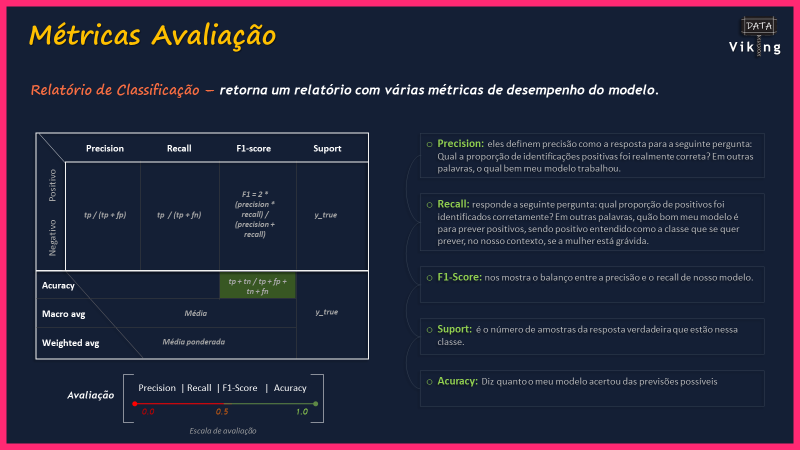

# **Teste do Modelo**

In [298]:
from nltk.stem.snowball import stopwords
def consolidar_funcoes(texto):
  # 1° etapa - Limpeza
  limpeza = limpeza_dados(texto)

  # 2° etapa - Remoção de stopwords
  stopwords = remover_stopwords(limpeza)

  # 3º etapa - Extração do radical
  rad = extrair_radical(stopwords)

  # 4º etapa - Vetorização (Criação da matriz esparsa)
  vet = Vetorizacao.transform( [rad] )

  # 5º etapa - Realizar as previsões
  pred = modelo_NB.predict(vet)

  # 6º etapa - Retornar o valor da previsão

  return (pred)

In [303]:
escrevendo_tweet = input('O que está pensando?: ')

print(f'O sentimento da frase é o seguinte: {consolidar_funcoes(escrevendo_tweet)[0]}')

O que está pensando?: Não vou votar no atual governo
O sentimento da frase é o seguinte: Neutro


# **Upgrade no Modelo**

In [310]:
# Outros Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Algortimos
algoritmos = [
    LogisticRegression(),
    RandomForestClassifier( n_estimators=300, max_depth=12 ),
    MultinomialNB(),
    SVC()
]

# Nomes dos algoritmos
lista_nome = [ 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'VSM']

In [311]:
# Lista das acurácias
resultado_acuracia = []

# Loop
for nome, modelo in zip( lista_nome, algoritmos):

  # Atribuir algoritmo
  alg = modelo

  # Treinamento do algoritmo
  alg.fit( vetor_X_treino, y_treino )

  # Transformar os dados de teste
  vetor_teste = Vetorizacao.transform( x_teste )

  # Realizar as previsões com o modelo treinado
  previsoes_teste = alg.predict( vetor_teste )

  # Avaliar a acurácia do modelo
  resultado = accuracy_score( y_teste, previsoes_teste )

  # Registrar os resultados
  resultado_acuracia.append( resultado ),

In [312]:
# Organizar em um dicionário
dicionario = {
    'Nome' : lista_nome,
    'Resultado' : resultado_acuracia
}

pd.DataFrame(dicionario).sort_values('Resultado', ascending= False)

,Nome,Resultado
3,VSM,0.947962
0,Logistic Regression,0.942758
2,Naive Bayes,0.917606
1,Random Forest,0.888985
